In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats


In [2]:
data_2019 = pd.read_csv('rawdata/2019.csv', encoding = 'euc-kr')
data_2020 = pd.read_csv('rawdata/2020.csv', encoding = 'euc-kr')
data_2021 = pd.read_csv('rawdata/2021.csv', encoding = 'euc-kr')
data_2022 = pd.read_csv('rawdata/2022.csv', encoding = 'euc-kr')
data_2023 = pd.read_csv('rawdata/2023.csv', encoding = 'euc-kr')
data_2024 = pd.read_csv('rawdata/2024.csv', encoding = 'euc-kr')

C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_7604\607619566.py:1: DtypeWarning: Columns (36,44,52,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2019 = pd.read_csv('rawdata/2019.csv', encoding = 'euc-kr')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_7604\607619566.py:2: DtypeWarning: Columns (36,44,52,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv('rawdata/2020.csv', encoding = 'euc-kr')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_7604\607619566.py:3: DtypeWarning: Columns (36,44,52,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('rawdata/2021.csv', encoding = 'euc-kr')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_7604\607619566.py:4: DtypeWarning: Columns (54,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv('rawdata/2022.csv', encoding = 'euc-kr')
C:\Users\Tammy K

In [3]:
pd.set_option('display.max_columns', None)
print(data_2019.columns)

Index(['조사연월', '가구구분코드', '가구원수', '취업인원수', '세대구분코드', '배우자코드', '가구주_관계코드',
       '가구주_성별코드', '가구주_연령', '가구주_학력코드',
       ...
       '가계지출_소비지출_기타상품서비스_기타서비스금액구입비', '가계지출_비소비지출금액', '가계지출_비소비지출_경상조세',
       '가계지출_비소비지출_비경상조세', '가계지출_비소비지출_연금기여금', '가계지출_비소비지출_사회보장구입비',
       '가계지출_비소비지출_이자비용', '가계지출_비소비지출_가구간이전지출금액', '가계지출_비소비지출_비영리단체이전지출금액',
       '도시읍면부구분코드'],
      dtype='object', length=217)


In [4]:
columns = list(data_2019.columns)
for col in columns:
    print(col)

조사연월
가구구분코드
가구원수
취업인원수
세대구분코드
배우자코드
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
가구원2_가구주관계코드
가구원2_성별코드
가구원2_연령
가구원2_학력코드
가구원2_수학구분코드
가구원2_취업여부
가구원2_7차직업분류코드
가구원2_종사상지위코드
가구원3_가구주관계코드
가구원3_성별코드
가구원3_연령
가구원3_학력코드
가구원3_수학구분코드
가구원3_취업여부
가구원3_7차직업분류코드
가구원3_종사상지위코드
가구원4_가구주관계코드
가구원4_성별코드
가구원4_연령
가구원4_학력코드
가구원4_수학구분코드
가구원4_취업여부
가구원4_7차직업분류코드
가구원4_종사상지위코드
가구원5_가구주관계코드
가구원5_성별코드
가구원5_연령
가구원5_학력코드
가구원5_수학구분코드
가구원5_취업여부
가구원5_7차직업분류코드
가구원5_종사상지위코드
가구원6_가구주관계코드
가구원6_성별코드
가구원6_연령
가구원6_학력코드
가구원6_수학구분코드
가구원6_취업여부
가구원6_7차직업분류코드
가구원6_종사상지위코드
가구원7_가구주관계코드
가구원7_성별코드
가구원7_연령
가구원7_학력코드
가구원7_수학구분코드
가구원7_취업여부
가구원7_7차직업분류코드
가구원7_종사상지위코드
가구원8_가구주관계코드
가구원8_성별코드
가구원8_연령
가구원8_학력코드
가구원8_수학구분코드
가구원8_취업여부
가구원8_7차직업분류코드
가구원8_종사상지위코드
가구원9_가구주관계코드
가구원9_성별코드
가구원9_연령
가구원9_학력코드
가구원9_수학구분코드
가구원9_취업여부
가구원9_7차직업분류코드
가구원9_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
전국전체가구_1인이상소득5분위코드
전국근로자가구_1인이상소득5분위코드
전국근로자외가구_1인이상소득5분위코드
도시전체가구_1인이상소득5분위코드
도시근로자가구_1인이상소득5분위코드
도시근로자외가구_1인이상소득5분위코드
전국전체가구_1인이상소득10분위코드

In [5]:
data_2019['조사연도'] = data_2019['조사연월']//100
data_2020['조사연도'] = data_2020['조사연월']//100
data_2021['조사연도'] = data_2021['조사연월']//100
data_2022['조사연도'] = data_2022['조사연월']//100
data_2023['조사연도'] = data_2023['조사연월']//100
data_2024['조사연도'] = data_2024['조사연월']//100

In [6]:
data_list = [data_2019, data_2020, data_2021, data_2022, data_2023, data_2024]
data_all = pd.concat(data_list, ignore_index = True)
data_all.tail()

,조사연월,가구구분코드,가구원수,취업인원수,세대구분코드,배우자코드,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_7차직업분류코드,가구주_종사상지위코드,가구원2_가구주관계코드,가구원2_성별코드,가구원2_연령,가구원2_학력코드,가구원2_수학구분코드,가구원2_취업여부,가구원2_7차직업분류코드,가구원2_종사상지위코드,가구원3_가구주관계코드,가구원3_성별코드,가구원3_연령,가구원3_학력코드,가구원3_수학구분코드,가구원3_취업여부,가구원3_7차직업분류코드,가구원3_종사상지위코드,가구원4_가구주관계코드,가구원4_성별코드,가구원4_연령,가구원4_학력코드,가구원4_수학구분코드,가구원4_취업여부,가구원4_7차직업분류코드,가구원4_종사상지위코드,가구원5_가구주관계코드,가구원5_성별코드,가구원5_연령,가구원5_학력코드,가구원5_수학구분코드,가구원5_취업여부,가구원5_7차직업분류코드,가구원5_종사상지위코드,가구원6_가구주관계코드,가구원6_성별코드,가구원6_연령,가구원6_학력코드,가구원6_수학구분코드,가구원6_취업여부,가구원6_7차직업분류코드,가구원6_종사상지위코드,가구원7_가구주관계코드,가구원7_성별코드,가구원7_연령,가구원7_학력코드,가구원7_수학구분코드,가구원7_취업여부,가구원7_7차직업분류코드,가구원7_종사상지위코드,가구원8_가구주관계코드,가구원8_성별코드,가구원8_연령,가구원8_학력코드,가구원8_수학구분코드,가구원8_취업여부,가구원8_7차직업분류코드,가구원8_종사상지위코드,가구원9_가구주관계코드,가구원9_성별코드,가구원9_연령,가구원9_학력코드,가구원9_수학구분코드,가구원9_취업여부,가구원9_7차직업분류코드,가구원9_종사상지위코드,입주형태코드,월세평가금액,전세보증금,월세사글세,전국전체가구_1인이상소득5분위코드,전국근로자가구_1인이상소득5분위코드,전국근로자외가구_1인이상소득5분위코드,도시전체가구_1인이상소득5분위코드,도시근로자가구_1인이상소득5분위코드,도시근로자외가구_1인이상소득5분위코드,전국전체가구_1인이상소득10분위코드,전국근로자가구_1인이상소득10분위코드,전국근로자외가구_1인이상소득10분위코드,도시전체가구_1인이상소득10분위코드,도시근로자가구_1인이상소득10분위코드,도시근로자외가구_1인이상소득10분위코드,소득구간코드,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_식료품비주류음료_곡물구입비,가계지출_소비지출_식료품비주류음료_곡물가공품구입비,가계지출_소비지출_식료품비주류음료_빵떡류구입비,가계지출_소비지출_식료품비주류음료_육류구입비,가계지출_소비지출_식료품비주류음료_육류가공품구입비,가계지출_소비지출_식료품비주류음료_신선수산동물구입비,가계지출_소비지출_식료품비주류음료_염건수산동물구입비,가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비,가계지출_소비지출_식료품비주류음료_유제품및알구입비,가계지출_소비지출_식료품비주류음료_유지류구입비,가계지출_소비지출_식료품비주류음료_과일가공품구입비,가계지출_소비지출_식료품비주류음료_채소가공품구입비,가계지출_소비지출_식료품비주류음료_해조가공품구입비,가계지출_소비지출_식료품비주류음료_당류과자류구입비,가계지출_소비지출_식료품비주류음료_조미식품구입비,가계지출_소비지출_식료품비주류음료_기타식품구입비,가계지출_소비지출_식료품비주류음료_커피차구입비,가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_주류담배_주류구입비,가계지출_소비지출_주류담배_담배구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_의류신발_직물및외의구입비,가계지출_소비지출_의류신발_내의구입비,가계지출_소비지출_의류신발_기타의복구입비,가계지출_소비지출_의류신발_의복관련서비스구입비,가계지출_소비지출_의류신발_신발구입비,가계지출_소비지출_의류신발_신발서비스구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_주거수도광열_실제주거비구입비,가계지출_소비지출_주거수도광열_주택유지수선구입비,가계지출_소비지출_주거수도광열_상하수도폐기물처리비,가계지출_소비지출_주거수도광열_기타주거관련서비스구입비,가계지출_소비지출_주거수도광열_연료비구입비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_가정용품가사서비스_가구조명구입비,가계지출_소비지출_가정용품가사서비스_실내장식구입비,가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액,가계지출_소비지출_가정용품가사서비스_가정용섬유구입비,가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비,가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액,가계지출_소비지출_가정용품가사서비스_가사용품구입비,가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비,가계지출_소비지출_가정용품가사서비스_가사소모품구입비,가계지출_소비지출_가정용품가사서비스_가사서비스금액,가계지출_소비지출_보건제품구입비,가계지출_소비지출_보건_의약품구입비,가계지출_소비지출_보건_의료용소모품구입비,가계지출_소비지출_보건_보건의료용품기구구입비,가계지출_소비지출_보건_외래의료서비스이용금액,가계지출_소비지출_보건_치과서비스이용금액,가계지출_소비지출_보건_기타의료서비스이용금액,가계지출_소비지출_보건_입원서비스이용금액,가계지출_소비지출_교통비,가계지출_소비지출_교통_자동차구입비,가계지출_소비지출_교통_기타운송기구구입비,가계지출_소비지출_교통_운송기구유지수리비,가계지출_소비지출_교통_운송기구연료비,가계지출_소비지출_교통_기타개인교통서비스이용금액,가계지출_소비지출_교통_철도운송금액,가계지출_소비지출_교통_육상운송금액,가계지출_소비지출_교통_기타운송금액,가계지출_소비지출_교통_기타교통관련서비스이용금액,가계지출_소비지출_통신비,가계지출_소비지출_통신_우편서비스이용금액,가계지출_소비지출_통신_통신장비구입비,가계지출_소비지출_통신_통신서비스이용금액,가계지출_소비지출_오락문화비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_오락문화_악기기구구입비,가계지출_소비지출_오락문화_오락문화내구재유지수리비,가계지출_소비지출_오락문화_장난감취미용품구입비,가계지출_소비지출_오락문화_캠핑운동관련용품구입비,가계지출_소비지출_오락문화_화훼관련용품구입비,가계지출_소비지출_오락문화_애완동물관련물품구입비,가계지출_소비지출_오락문화_화훼애완동물서비스이용금액,가계지출_소비지출_오락문화_운동오락서비스이용금액,가계지출_소비지출_오락문화_문화서비스이용금액,가계지출_소비지출_오락문화_복권구입비,가계지출_소비지출_오락문화_서적구입비,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_교육_정규교육비,가계지출_소비지출_교육_초등교육비,가계지출_소비지출_교육_중등교육비,가계지출_소비지출_교육_고등교육비,가계지출_소비지출_교육_학원보습교육비,가계지출_소비지출_교육_학생학원교육비,가계지출_소비지출_교육_성인학원비,가계지출_소비지출_교육_기타교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,가계지출_소비지출_기타상품서비스_이미용서비스이용금액,가계지출_소비지출_기타상품서비스_이미용기기구입비,가계지출_소비지출_기타상품서비스_위생이미용용품구입비,가계지출_소비지출_기타상품서비스_시계장신구구입비,가계지출_소비지출_기타상품서비스_기타개인용품구입비,가계지출_소비지출_기타상품서비스_복지시설비용금액,가계지출_소비지출_기타상품서비스_보험료,가계지출_소비지출_기타상품서비스_기타금융구입비,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드,조사연도,조사연월.1,가계지출_소비지출_음식숙박_식

In [7]:
print(data_all.shape)
print(data_all['조사연도'].value_counts().sort_index())
print(data_all.isnull().sum())

(73345, 220)
조사연도
2019     9510
2020    12122
2021    12391
2022    12700
2023    13144
2024    13478
Name: count, dtype: int64
조사연월                          0
가구구분코드                        0
가구원수                          0
취업인원수                         0
세대구분코드                        0
                          ...  
가계지출_비소비지출_비영리단체이전지출금액        0
도시읍면부구분코드                     0
조사연도                          0
조사연월.1                    34023
가계지출_소비지출_음식숙박_식대.1       34023
Length: 220, dtype: int64


In [8]:
columns = list(data_all.columns)
for col in columns:
    print(col)

조사연월
가구구분코드
가구원수
취업인원수
세대구분코드
배우자코드
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
가구원2_가구주관계코드
가구원2_성별코드
가구원2_연령
가구원2_학력코드
가구원2_수학구분코드
가구원2_취업여부
가구원2_7차직업분류코드
가구원2_종사상지위코드
가구원3_가구주관계코드
가구원3_성별코드
가구원3_연령
가구원3_학력코드
가구원3_수학구분코드
가구원3_취업여부
가구원3_7차직업분류코드
가구원3_종사상지위코드
가구원4_가구주관계코드
가구원4_성별코드
가구원4_연령
가구원4_학력코드
가구원4_수학구분코드
가구원4_취업여부
가구원4_7차직업분류코드
가구원4_종사상지위코드
가구원5_가구주관계코드
가구원5_성별코드
가구원5_연령
가구원5_학력코드
가구원5_수학구분코드
가구원5_취업여부
가구원5_7차직업분류코드
가구원5_종사상지위코드
가구원6_가구주관계코드
가구원6_성별코드
가구원6_연령
가구원6_학력코드
가구원6_수학구분코드
가구원6_취업여부
가구원6_7차직업분류코드
가구원6_종사상지위코드
가구원7_가구주관계코드
가구원7_성별코드
가구원7_연령
가구원7_학력코드
가구원7_수학구분코드
가구원7_취업여부
가구원7_7차직업분류코드
가구원7_종사상지위코드
가구원8_가구주관계코드
가구원8_성별코드
가구원8_연령
가구원8_학력코드
가구원8_수학구분코드
가구원8_취업여부
가구원8_7차직업분류코드
가구원8_종사상지위코드
가구원9_가구주관계코드
가구원9_성별코드
가구원9_연령
가구원9_학력코드
가구원9_수학구분코드
가구원9_취업여부
가구원9_7차직업분류코드
가구원9_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
전국전체가구_1인이상소득5분위코드
전국근로자가구_1인이상소득5분위코드
전국근로자외가구_1인이상소득5분위코드
도시전체가구_1인이상소득5분위코드
도시근로자가구_1인이상소득5분위코드
도시근로자외가구_1인이상소득5분위코드
전국전체가구_1인이상소득10분위코드

In [9]:
# 가구원 관련 내용 남기기
data1 = data_all.drop(columns=[
'취업인원수',
'세대구분코드',
'배우자코드',
'가구원2_가구주관계코드',
'가구원2_성별코드',
'가구원2_연령',
'가구원2_학력코드',
'가구원2_수학구분코드',
'가구원2_취업여부',
'가구원2_7차직업분류코드',
'가구원2_종사상지위코드',
'가구원3_가구주관계코드',
'가구원3_성별코드',
'가구원3_연령',
'가구원3_학력코드',
'가구원3_수학구분코드',
'가구원3_취업여부',
'가구원3_7차직업분류코드',
'가구원3_종사상지위코드',
'가구원4_가구주관계코드',
'가구원4_성별코드',
'가구원4_연령',
'가구원4_학력코드',
'가구원4_수학구분코드',
'가구원4_취업여부',
'가구원4_7차직업분류코드',
'가구원4_종사상지위코드',
'가구원5_가구주관계코드',
'가구원5_성별코드',
'가구원5_연령',
'가구원5_학력코드',
'가구원5_수학구분코드',
'가구원5_취업여부',
'가구원5_7차직업분류코드',
'가구원5_종사상지위코드',
'가구원6_가구주관계코드',
'가구원6_성별코드',
'가구원6_연령',
'가구원6_학력코드',
'가구원6_수학구분코드',
'가구원6_취업여부',
'가구원6_7차직업분류코드',
'가구원6_종사상지위코드',
'가구원7_가구주관계코드',
'가구원7_성별코드',
'가구원7_연령',
'가구원7_학력코드',
'가구원7_수학구분코드',
'가구원7_취업여부',
'가구원7_7차직업분류코드',
'가구원7_종사상지위코드',
'가구원8_가구주관계코드',
'가구원8_성별코드',
'가구원8_연령',
'가구원8_학력코드',
'가구원8_수학구분코드',
'가구원8_취업여부',
'가구원8_7차직업분류코드',
'가구원8_종사상지위코드',
'가구원9_가구주관계코드',
'가구원9_성별코드',
'가구원9_연령',
'가구원9_학력코드',
'가구원9_수학구분코드',
'가구원9_취업여부',
'가구원9_7차직업분류코드',
'가구원9_종사상지위코드',
'조사연월.1'
],inplace=False)

In [10]:
# 그 외 모든 내용 날리기
data2 = data1.drop(columns=[
    '전국전체가구_1인이상소득5분위코드', '전국근로자가구_1인이상소득5분위코드', '전국근로자외가구_1인이상소득5분위코드',
    '도시전체가구_1인이상소득5분위코드', '도시근로자가구_1인이상소득5분위코드', '도시근로자외가구_1인이상소득5분위코드',
    '전국전체가구_1인이상소득10분위코드', '전국근로자가구_1인이상소득10분위코드', '전국근로자외가구_1인이상소득10분위코드',
    '도시전체가구_1인이상소득10분위코드', '도시근로자가구_1인이상소득10분위코드', '도시근로자외가구_1인이상소득10분위코드',
    '가계지출_소비지출_식료품비주류음료_곡물구입비', 
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비', '가계지출_소비지출_식료품비주류음료_빵떡류구입비', 
    '가계지출_소비지출_식료품비주류음료_육류구입비', '가계지출_소비지출_식료품비주류음료_육류가공품구입비', 
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비', '가계지출_소비지출_식료품비주류음료_염건수산동물구입비', 
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비', '가계지출_소비지출_식료품비주류음료_유제품및알구입비', 
    '가계지출_소비지출_식료품비주류음료_유지류구입비', '가계지출_소비지출_식료품비주류음료_과일가공품구입비', 
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비', '가계지출_소비지출_식료품비주류음료_해조가공품구입비', 
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비', '가계지출_소비지출_식료품비주류음료_조미식품구입비', 
    '가계지출_소비지출_식료품비주류음료_기타식품구입비', '가계지출_소비지출_식료품비주류음료_커피차구입비', 
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비', '가계지출_소비지출_주류담배_주류구입비', 
    '가계지출_소비지출_주류담배_담배구입비', '가계지출_소비지출_의류신발_직물및외의구입비', 
    '가계지출_소비지출_의류신발_내의구입비', '가계지출_소비지출_의류신발_기타의복구입비', 
    '가계지출_소비지출_의류신발_의복관련서비스구입비', '가계지출_소비지출_의류신발_신발구입비', 
    '가계지출_소비지출_의류신발_신발서비스구입비', '가계지출_소비지출_주거수도광열_실제주거비구입비', 
    '가계지출_소비지출_주거수도광열_주택유지수선구입비', '가계지출_소비지출_주거수도광열_상하수도폐기물처리비', 
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비', '가계지출_소비지출_주거수도광열_연료비구입비', '가계지출_소비지출_가정용품가사서비스_가구조명구입비', 
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비', '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액', 
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비', '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비', 
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액', '가계지출_소비지출_가정용품가사서비스_가사용품구입비', 
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비', '가계지출_소비지출_가정용품가사서비스_가사소모품구입비', 
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액', '가계지출_소비지출_보건_의약품구입비', 
    '가계지출_소비지출_보건_의료용소모품구입비', '가계지출_소비지출_보건_보건의료용품기구구입비', 
    '가계지출_소비지출_보건_외래의료서비스이용금액', '가계지출_소비지출_보건_치과서비스이용금액', 
    '가계지출_소비지출_보건_기타의료서비스이용금액', '가계지출_소비지출_보건_입원서비스이용금액', 
    '가계지출_소비지출_교통_자동차구입비', '가계지출_소비지출_교통_기타운송기구구입비', 
    '가계지출_소비지출_교통_운송기구유지수리비', '가계지출_소비지출_교통_운송기구연료비', 
    '가계지출_소비지출_교통_기타개인교통서비스이용금액', '가계지출_소비지출_교통_철도운송금액', 
    '가계지출_소비지출_교통_육상운송금액', '가계지출_소비지출_교통_기타운송금액', 
    '가계지출_소비지출_교통_기타교통관련서비스이용금액', '가계지출_소비지출_통신_우편서비스이용금액', 
    '가계지출_소비지출_통신_통신장비구입비', '가계지출_소비지출_통신_통신서비스이용금액', 
    '가계지출_소비지출_교육_정규교육비', '가계지출_소비지출_교육_초등교육비', 
    '가계지출_소비지출_교육_중등교육비', '가계지출_소비지출_교육_고등교육비', 
    '가계지출_소비지출_교육_학원보습교육비', '가계지출_소비지출_교육_학생학원교육비', 
    '가계지출_소비지출_교육_성인학원비', '가계지출_소비지출_교육_기타교육비', 
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액', '가계지출_소비지출_기타상품서비스_이미용기기구입비', 
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비', '가계지출_소비지출_기타상품서비스_시계장신구구입비', 
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비', '가계지출_소비지출_기타상품서비스_복지시설비용금액', 
    '가계지출_소비지출_기타상품서비스_보험료', '가계지출_소비지출_기타상품서비스_기타금융구입비', 
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비', '가계지출_비소비지출금액', 
    '가계지출_비소비지출_경상조세', '가계지출_비소비지출_비경상조세', 
    '가계지출_비소비지출_연금기여금', '가계지출_비소비지출_사회보장구입비', 
    '가계지출_비소비지출_이자비용', '가계지출_비소비지출_가구간이전지출금액', 
    '가계지출_비소비지출_비영리단체이전지출금액', '가계지출_소비지출_음식숙박_식대.1'
], inplace = False)

In [11]:
columns = list(data2.columns)
for col in columns:
    print(col)

조사연월
가구구분코드
가구원수
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
소득구간코드
가계지출금액
가계지출_소비지출금액
가계지출_소비지출_식료품비주류음료구입비
가계지출_소비지출_주류담배구입비
가계지출_소비지출_의류신발구입비
가계지출_소비지출_주거수도광열비
가계지출_소비지출_가정용품가사서비스이용금액
가계지출_소비지출_보건제품구입비
가계지출_소비지출_교통비
가계지출_소비지출_통신비
가계지출_소비지출_오락문화비
가계지출_소비지출_오락문화_영상음향기기구입비
가계지출_소비지출_오락문화_사진광학장비구입비
가계지출_소비지출_오락문화_정보처리장치구입비
가계지출_소비지출_오락문화_기록매체구입비
가계지출_소비지출_오락문화_영상음향정보기기수리비
가계지출_소비지출_오락문화_내구재구입비
가계지출_소비지출_오락문화_악기기구구입비
가계지출_소비지출_오락문화_오락문화내구재유지수리비
가계지출_소비지출_오락문화_장난감취미용품구입비
가계지출_소비지출_오락문화_캠핑운동관련용품구입비
가계지출_소비지출_오락문화_화훼관련용품구입비
가계지출_소비지출_오락문화_애완동물관련물품구입비
가계지출_소비지출_오락문화_화훼애완동물서비스이용금액
가계지출_소비지출_오락문화_운동오락서비스이용금액
가계지출_소비지출_오락문화_문화서비스이용금액
가계지출_소비지출_오락문화_복권구입비
가계지출_소비지출_오락문화_서적구입비
가계지출_소비지출_오락문화_기타인쇄물구입비
가계지출_소비지출_오락문화_문구구입비
가계지출_소비지출_오락문화_단체여행경비
가계지출_소비지출_교육비
가계지출_소비지출_음식숙박비
가계지출_소비지출_음식숙박_식대
가계지출_소비지출_음식숙박_숙박비
가계지출_소비지출_기타상품서비스이용금액
도시읍면부구분코드
조사연도


In [12]:
young = data2
young.head()

,조사연월,가구구분코드,가구원수,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_7차직업분류코드,가구주_종사상지위코드,입주형태코드,월세평가금액,전세보증금,월세사글세,소득구간코드,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_보건제품구입비,가계지출_소비지출_교통비,가계지출_소비지출_통신비,가계지출_소비지출_오락문화비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_오락문화_악기기구구입비,가계지출_소비지출_오락문화_오락문화내구재유지수리비,가계지출_소비지출_오락문화_장난감취미용품구입비,가계지출_소비지출_오락문화_캠핑운동관련용품구입비,가계지출_소비지출_오락문화_화훼관련용품구입비,가계지출_소비지출_오락문화_애완동물관련물품구입비,가계지출_소비지출_오락문화_화훼애완동물서비스이용금액,가계지출_소비지출_오락문화_운동오락서비스이용금액,가계지출_소비지출_오락문화_문화서비스이용금액,가계지출_소비지출_오락문화_복권구입비,가계지출_소비지출_오락문화_서적구입비,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,도시읍면부구분코드,조사연도
0,201900,1,1,1,1,31,4,1,1,3,1.0,4,500,60000,0,4,4968138,2845989,734800,59500,263600,113430,499910,81000,100000,46114,142916,0,0,0,0,0,0,0,0,0,0,0,0,0,17000,125916,0,0,0,0,0,0,279000,279000,0,525719,1,2019
1,201900,1,1,1,1,34,5,1,1,3,1.0,4,190,30000,0,5,4487267,1745827,74205,146750,0,73680,130000,170300,319075,88250,138682,0,0,0,0,0,0,0,0,0,83232,15000,0,0,40450,0,0,0,0,0,0,0,597385,597385,0,7500,1,2019
2,201900,1,1,1,1,34,6,1,1,3,1.0,2,300,0,0,6,6129518,594445,37673,6320,17300,175960,17267,22183,111833,0,38293,0,0,10120,0,0,0,0,0,0,12240,0,0,0,9000,5433,0,0,0,1500,0,0,96133,96133,0,71481,0,2019
3,201900,1,1,1,1,34,6,1,1,9,1.0,4,306,70000,0,5,2721557,1029301,17913,2267,0,68134,3833,203767,162333,49430,14210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14210,0,0,0,0,0,0,435500,435500,0,71914,1,2019
4,201900,1,1,1,1,36,7,1,1,3,1.0,6,310,2000,300,5,4511297,1969138,74217,15596,8022,317993,13148,39778,397022,208180,489173,0,0,0,0,0,0,0,0,0,2778,0,0,0,328667,32155,0,0,0,0,125573,0,388022,388022,0,17987,1,2019


In [13]:
selected_columns = [
    '가구원수', '가구주_성별코드', '가구주_연령', '가구주_학력코드',
    '가구주_7차직업분류코드', '가구주_종사상지위코드',
    '소득구간코드', '가계지출금액', '가계지출_소비지출금액',
    '가계지출_소비지출_식료품비주류음료구입비',
    '가계지출_소비지출_주거수도광열비',
    '가계지출_소비지출_보건제품구입비',
    '가계지출_소비지출_교통비',
    '가계지출_소비지출_통신비',
    '가계지출_소비지출_주류담배구입비',
    '가계지출_소비지출_의류신발구입비',
    '가계지출_소비지출_가정용품가사서비스이용금액',
    '가계지출_소비지출_오락문화비',
    '가계지출_소비지출_교육비',
    '가계지출_소비지출_음식숙박비',
    '가계지출_소비지출_기타상품서비스이용금액',
    '조사연도'
]

young2 = young[selected_columns].copy()
print(young2.head())

   가구원수  가구주_성별코드  가구주_연령  가구주_학력코드 가구주_7차직업분류코드  가구주_종사상지위코드  소득구간코드  \
0     1         1      31         4            3          1.0       4   
1     1         1      34         5            3          1.0       5   
2     1         1      34         6            3          1.0       6   
3     1         1      34         6            9          1.0       5   
4     1         1      36         7            3          1.0       5   

    가계지출금액  가계지출_소비지출금액  가계지출_소비지출_식료품비주류음료구입비  가계지출_소비지출_주거수도광열비  \
0  4968138      2845989                 734800             113430   
1  4487267      1745827                  74205              73680   
2  6129518       594445                  37673             175960   
3  2721557      1029301                  17913              68134   
4  4511297      1969138                  74217             317993   

   가계지출_소비지출_보건제품구입비  가계지출_소비지출_교통비  가계지출_소비지출_통신비  가계지출_소비지출_주류담배구입비  \
0              81000         100000          46114              59500   


In [14]:
young2.rename(columns={
    '가구주_성별코드': '성별',
    '가구주_연령': '나이',
    '가구주_학력코드': '학력',
    '가구주_7차직업분류코드': '직업',
    '가구주_종사상지위코드': '종사상지위',
    '소득구간코드': '소득',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품비',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_보건제품구입비': '보건제품구입비',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_주류담배구입비': '주류담배구입비',
    '가계지출_소비지출_의류신발구입비': '의류신발구입비',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용금액',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_기타상품서비스이용금액': '기타상품서비스이용금액'
}, inplace=True)

young2.head()

,가구원수,성별,나이,학력,직업,종사상지위,소득,가계지출금액,가계지출_소비지출금액,식료품비,주거수도광열비,보건제품구입비,교통비,통신비,주류담배구입비,의류신발구입비,가정용품가사서비스이용금액,오락문화비,교육비,음식숙박비,기타상품서비스이용금액,조사연도
0,1,1,31,4,3,1.0,4,4968138,2845989,734800,113430,81000,100000,46114,59500,263600,499910,142916,0,279000,525719,2019
1,1,1,34,5,3,1.0,5,4487267,1745827,74205,73680,170300,319075,88250,146750,0,130000,138682,0,597385,7500,2019
2,1,1,34,6,3,1.0,6,6129518,594445,37673,175960,22183,111833,0,6320,17300,17267,38293,0,96133,71481,2019
3,1,1,34,6,9,1.0,5,2721557,1029301,17913,68134,203767,162333,49430,2267,0,3833,14210,0,435500,71914,2019
4,1,1,36,7,3,1.0,5,4511297,1969138,74217,317993,39778,397022,208180,15596,8022,13148,489173,0,388022,17987,2019


In [15]:
# 원본 데이터 크기
print("전체 데이터 수: ", len(young2)) #73345

# 1인 가구
condition_solo = (young2['가구원수'] == 1)
young2 = young2[condition_solo]
print("1인 가구 수: ", len(young2)) # 22678

# 가구주 연령이 19세 이상 34세 이하인 경우 필터링
condition_age = (young2['나이'] >= 19) & (young2['나이'] <= 34)
young2 = young2[condition_solo & condition_age]
print("1인 청년가구 수", len(young2))

전체 데이터 수:  73345
1인 가구 수:  22678
1인 청년가구 수 5299


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_7604\3268136545.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  young2 = young2[condition_solo & condition_age]


In [16]:
young2.columns

Index(['가구원수', '성별', '나이', '학력', '직업', '종사상지위', '소득', '가계지출금액', '가계지출_소비지출금액',
       '식료품비', '주거수도광열비', '보건제품구입비', '교통비', '통신비', '주류담배구입비', '의류신발구입비',
       '가정용품가사서비스이용금액', '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용금액', '조사연도'],
      dtype='object')

In [17]:
# 성별, 학력, 직업, 종사상지위, 소득 변수를 범주형 변수로 지정
young2['성별'] = young2['성별'].astype('category')
young2['학력'] = young2['학력'].astype('category')
young2['직업'] = young2['직업'].astype('category')
young2['종사상지위'] = young2['종사상지위'].astype('category')
young2['소득'] = young2['소득'].astype('category')

young2.dtypes
#young2.info()

가구원수                int64
성별               category
나이                  int64
학력               category
직업               category
종사상지위            category
소득               category
가계지출금액              int64
가계지출_소비지출금액         int64
식료품비                int64
주거수도광열비             int64
보건제품구입비             int64
교통비                 int64
통신비                 int64
주류담배구입비             int64
의류신발구입비             int64
가정용품가사서비스이용금액       int64
오락문화비               int64
교육비                 int64
음식숙박비               int64
기타상품서비스이용금액         int64
조사연도                int64
dtype: object

In [18]:
# 연령을 그룹화하기
def 연령그룹화(나이):
    if 19 <= 나이 <= 24:
        return '대학생'
    elif 25 <= 나이 <= 29:
        return '사회초년생'
    elif 30 <= 나이 <= 34:
        return '30대 초반'
    else:
        return '기타'

# 연령그룹 변수 생성
young2['연령그룹'] = young2['나이'].apply(연령그룹화)
young2['연령그룹'].value_counts()
young2['나이'].isnull().sum()

0

In [19]:
# A 직업군인과 Z 무직 기타는 제외
young2 = young2[(young2['직업'] != 'A') & (young2['직업'] != 'Z')]
young2['직업'] = young2['직업'].cat.remove_unused_categories()

young2['직업'].value_counts()

직업
2    1624
3    1212
4     561
5     344
8     282
7     232
9     221
1       8
6       7
Name: count, dtype: int64

In [20]:
# 직업군 그룹화 함수
def 직업그룹화(직업):
    if 직업 in ['1', '2']:
        return '전문가'
    elif 직업 == '3':
        return '사무직'
    elif 직업 in ['4', '5']:
        return '서비스/판매'
    elif 직업 in ['6', '7', '8', '9']:
        return '육체노동자'
    else:
        return '기타'

# 새로운 변수 생성
young2['직업군'] = young2['직업'].apply(직업그룹화).astype('category')

# 결과 확인
print(young2['직업군'].value_counts())

직업군
전문가       1632
사무직       1212
서비스/판매     905
육체노동자      742
Name: count, dtype: int64


In [21]:
display(young2['소득'])
print(young2['소득'].dtype)

0        4
1        5
2        6
3        5
136      3
        ..
73204    4
73278    5
73317    2
73332    3
73333    3
Name: 소득, Length: 4491, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

category


In [22]:
# 소득군 그룹화 함수 (정수형 기준)
def 소득그룹화(소득):
    if 소득 in [1, 2]:
        return '200만원 미만'
    elif 소득 == 3:
        return '200-300만원 미만'
    elif 소득 == 4:
        return '300-400만원 미만'
    elif 소득 in [5, 6, 7, 8]:
        return '400만원 이상'
    else:
        return '기타'

# 새로운 변수 생성
young2['소득군'] = young2['소득'].apply(소득그룹화).astype('category')

# 결과 확인
print(young2['소득군'].value_counts(dropna=False))


소득군
200-300만원 미만    1435
300-400만원 미만    1120
400만원 이상        1047
200만원 미만         889
Name: count, dtype: int64


In [23]:
import pandas as pd

# 필수지출 항목 리스트
essential_items = ['식료품비', '주거수도광열비', '보건제품구입비', '교통비', '통신비']

# 비필수지출 항목 리스트 = 전체 항목 중 소비지출 항목에서 필수 항목 제외
consumption_items = ['식료품비', '주거수도광열비', '보건제품구입비', '교통비', '통신비',
                     '주류담배구입비', '의류신발구입비', '가정용품가사서비스이용금액',
                     '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용금액']

non_essential_items = [item for item in consumption_items if item not in essential_items]

# 필수지출 및 비필수지출 변수 생성
young2['필수지출'] = young2[essential_items].sum(axis=1)
young2['비필수지출'] = young2[non_essential_items].sum(axis=1)

# 총소비지출 대비 비중 (%) 계산 후 소수점 1자리로 반올림
young2['필수지출비중'] = round(young2['필수지출'] / young2['가계지출_소비지출금액'] * 100, 1)
young2['비필수지출비중'] = round(young2['비필수지출'] / young2['가계지출_소비지출금액'] * 100, 1)


In [24]:
young2

,가구원수,성별,나이,학력,직업,종사상지위,소득,가계지출금액,가계지출_소비지출금액,식료품비,주거수도광열비,보건제품구입비,교통비,통신비,주류담배구입비,의류신발구입비,가정용품가사서비스이용금액,오락문화비,교육비,음식숙박비,기타상품서비스이용금액,조사연도,연령그룹,직업군,소득군,필수지출,비필수지출,필수지출비중,비필수지출비중
0,1,1,31,4,3,1.0,4,4968138,2845989,734800,113430,81000,100000,46114,59500,263600,499910,142916,0,279000,525719,2019,30대 초반,사무직,300-400만원 미만,1075344,1770645,37.8,62.2
1,1,1,34,5,3,1.0,5,4487267,1745827,74205,73680,170300,319075,88250,146750,0,130000,138682,0,597385,7500,2019,30대 초반,사무직,400만원 이상,725510,1020317,41.6,58.4
2,1,1,34,6,3,1.0,6,6129518,594445,37673,175960,22183,111833,0,6320,17300,17267,38293,0,96133,71481,2019,30대 초반,사무직,400만원 이상,347649,246794,58.5,41.5
3,1,1,34,6,9,1.0,5,2721557,1029301,17913,68134,203767,162333,49430,2267,0,3833,14210,0,435500,71914,2019,30대 초반,육체노동자,400만원 이상,501577,527724,48.7,51.3
136,1,1,19,4,3,1.0,3,2665048,1573323,53345,320763,9000,126355,52069,9625,22200,395000,60333,0,458255,66378,2019,대학생,사무직,200-300만원 미만,561532,1011791,35.7,64.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73204,1,1,28,6,4,5.0,4,1220762,1190842,110312,556057,1000,71383,74883,74443,0,1400,128091,0,119031,54241,2024,사회초년생,서비스/판매,300-400만원 미만,813635,377206,68.3,31.7
73278,1,2,33,4,7,2.0,5,4680211,4153170,520295,806635,57343,189974,143648,268000,178873,161723,132026,0,1018823,675831,2024,30대 초반,육체노동자,400만원 이상,1717895,2435276,41.4,58.6
73317,1,2,20,6,4,3.0,2,1307697,1307697,178515,281855,4100,45815,310000,690,54850,2995,163167,0,99492,166220,2024,대학생,서비스/판매,200만원 미만,820285,487414,62.7,37.3
73332,1,2,28,5,3,1.0,3,1145116,589077,133465,139228,66550,14662,68831,0,28667,1823,34770,0,99755,1326,2024,사회초년생,사무직,200-300만원 미만,422736,166341,71.8,28.2


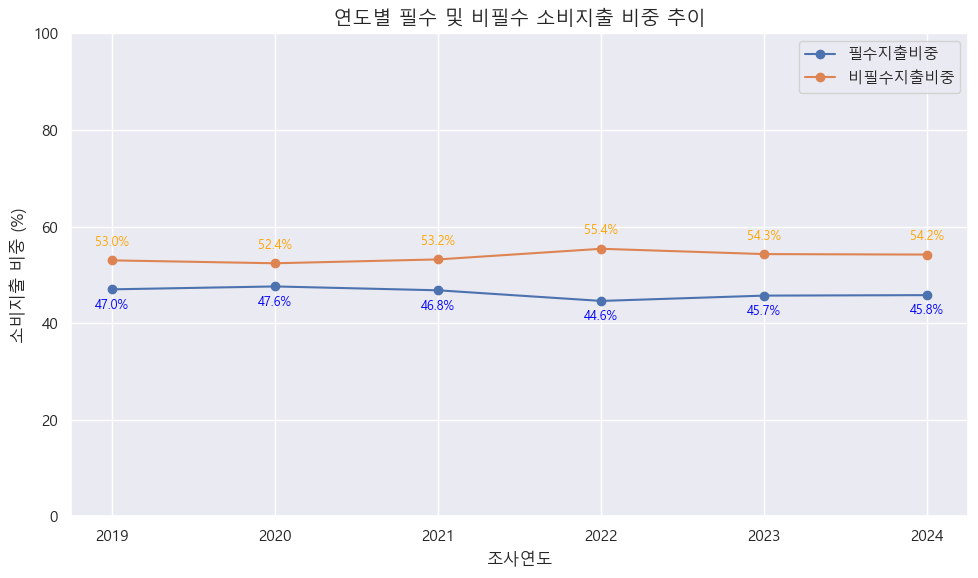

In [31]:
# 연도별 필수/비필수 지출비중 중앙값 구하기
annual_trend = young2.groupby('조사연도')[['필수지출비중', '비필수지출비중']].median().reset_index()

# 선그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(annual_trend['조사연도'], annual_trend['필수지출비중'], marker='o', label='필수지출비중')
plt.plot(annual_trend['조사연도'], annual_trend['비필수지출비중'], marker='o', label='비필수지출비중')

# 데이터 라벨 추가
for i in range(len(annual_trend)):
    x = annual_trend['조사연도'][i]
    y1 = annual_trend['필수지출비중'][i]
    y2 = annual_trend['비필수지출비중'][i]
    plt.text(x, y1 - 4, f'{y1:.1f}%', ha='center', fontsize=9, color='blue')
    plt.text(x, y2 + 3, f'{y2:.1f}%', ha='center', fontsize=9, color='orange')

plt.title('연도별 필수 및 비필수 소비지출 비중 추이', fontsize=14)
plt.xlabel('조사연도', fontsize=12)
plt.ylabel('소비지출 비중 (%)', fontsize=12)
plt.xticks(annual_trend['조사연도'])  # 연도 눈금 고정
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 소득군별 필수/비필수 소비지출 비중 누적막대그래프

In [32]:
young2.columns

Index(['가구원수', '성별', '나이', '학력', '직업', '종사상지위', '소득', '가계지출금액', '가계지출_소비지출금액',
       '식료품비', '주거수도광열비', '보건제품구입비', '교통비', '통신비', '주류담배구입비', '의류신발구입비',
       '가정용품가사서비스이용금액', '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용금액', '조사연도', '연령그룹',
       '직업군', '소득군', '필수지출', '비필수지출', '필수지출비중', '비필수지출비중'],
      dtype='object')

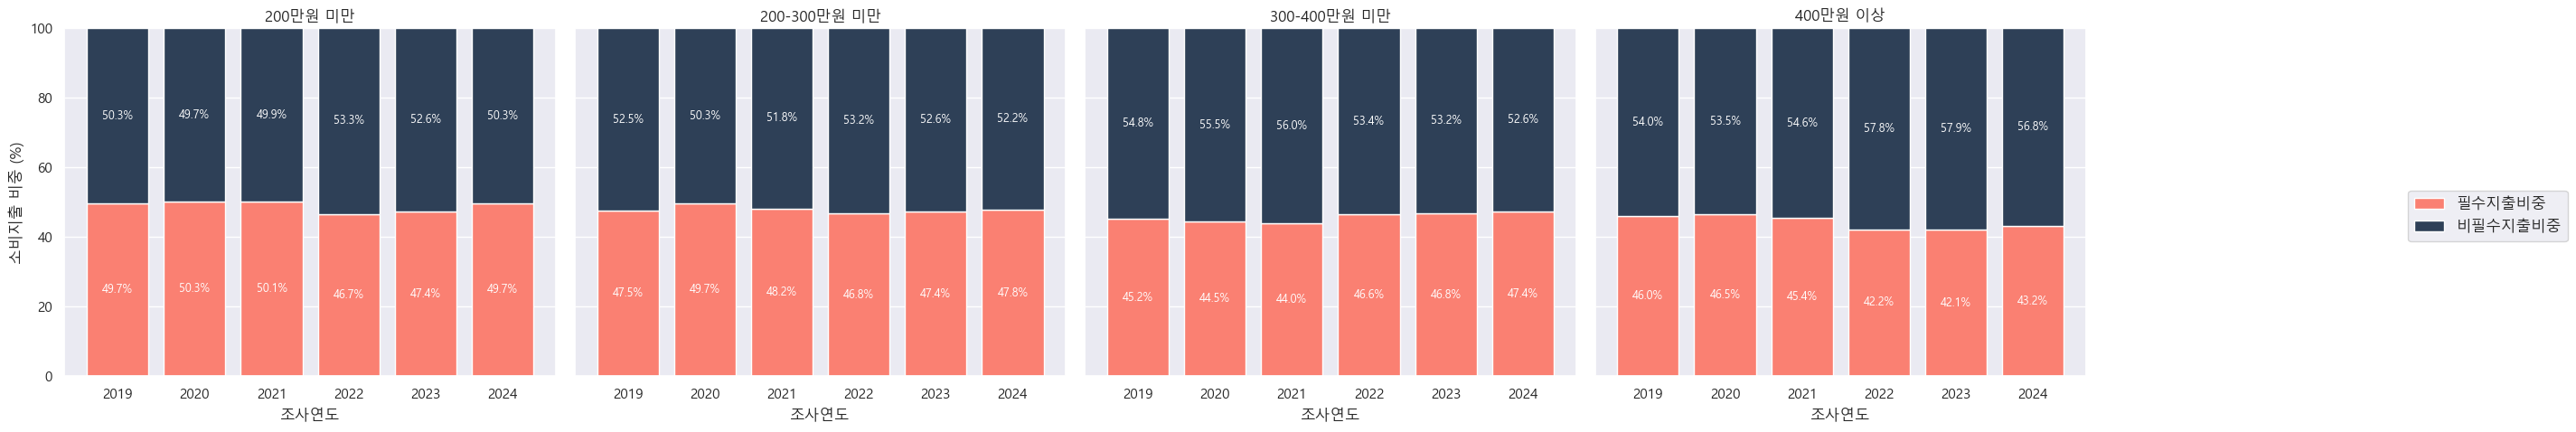

In [48]:
import matplotlib.pyplot as plt
import numpy as np

income_groups = ['200만원 미만', '200-300만원 미만', '300-400만원 미만', '400만원 이상']
years = sorted(young2['조사연도'].unique())

fig, axes = plt.subplots(1, len(income_groups), figsize=(26, 5), sharey=True)

for i, income in enumerate(income_groups):
    ax = axes[i]
    subset = young2[young2['소득군'] == income].groupby('조사연도')[['필수지출비중', '비필수지출비중']].mean().reset_index()
    
    # 누적막대그래프
    ax.bar(subset['조사연도'], subset['필수지출비중'], label='필수지출비중', color='salmon')
    ax.bar(subset['조사연도'], subset['비필수지출비중'], bottom=subset['필수지출비중'], label='비필수지출비중', color='#2E4057')

    # 퍼센티지 라벨 추가
    for j, year in enumerate(subset['조사연도']):
        필수 = subset.loc[j, '필수지출비중']
        비필수 = subset.loc[j, '비필수지출비중']
        ax.text(year, 필수 / 2, f"{필수:.1f}%", ha='center', va='center', color='white', fontsize=9)
        ax.text(year, 필수 + 비필수 / 2, f"{비필수:.1f}%", ha='center', va='center', color='white', fontsize=9)
    
    ax.set_title(f'{income}')
    ax.set_xlabel('조사연도')
    ax.set_ylim(0, 100)
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('소비지출 비중 (%)')
    ax.set_xticks(years)

# 범례를 맨 오른쪽 그래프 밖으로 이동
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # 범례 공간 확보
plt.show()


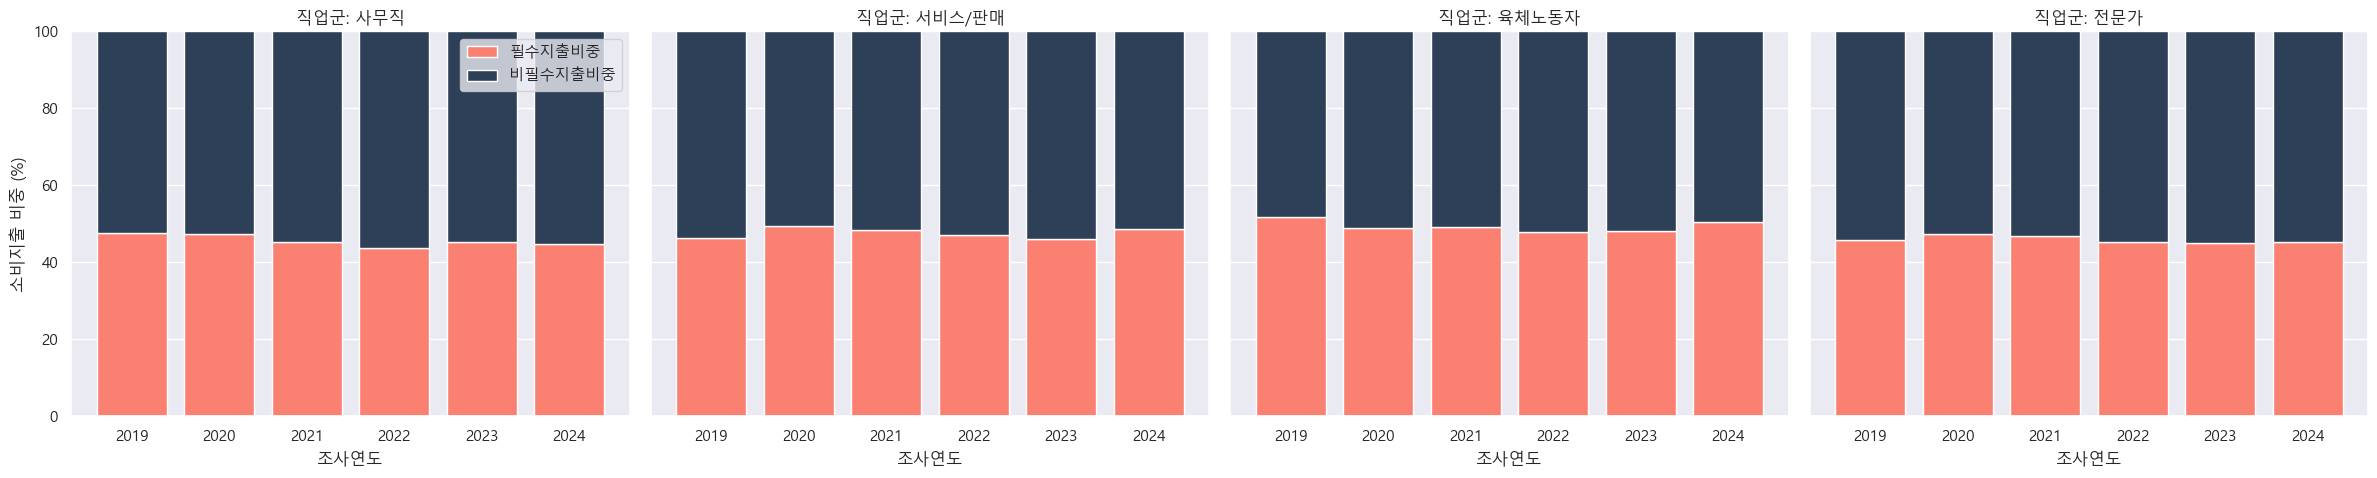

In [39]:
job_groups = sorted(young2['직업군'].unique())  # 4개 그룹 전체

fig, axes = plt.subplots(1, len(job_groups), figsize=(24, 5), sharey=True)

for i, job in enumerate(job_groups):
    ax = axes[i]
    subset = young2[young2['직업군'] == job].groupby('조사연도')[['필수지출비중', '비필수지출비중']].mean().reset_index()
    ax.bar(subset['조사연도'], subset['필수지출비중'], label='필수지출비중', color='salmon')
    ax.bar(subset['조사연도'], subset['비필수지출비중'], bottom=subset['필수지출비중'], label='비필수지출비중', color='#2E4057')
    ax.set_title(f'직업군: {job}')
    ax.set_xlabel('조사연도')
    ax.set_ylim(0, 100)
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('소비지출 비중 (%)')
    ax.set_xticks(years)

axes[0].legend(loc='upper right')
plt.tight_layout()
plt.show()


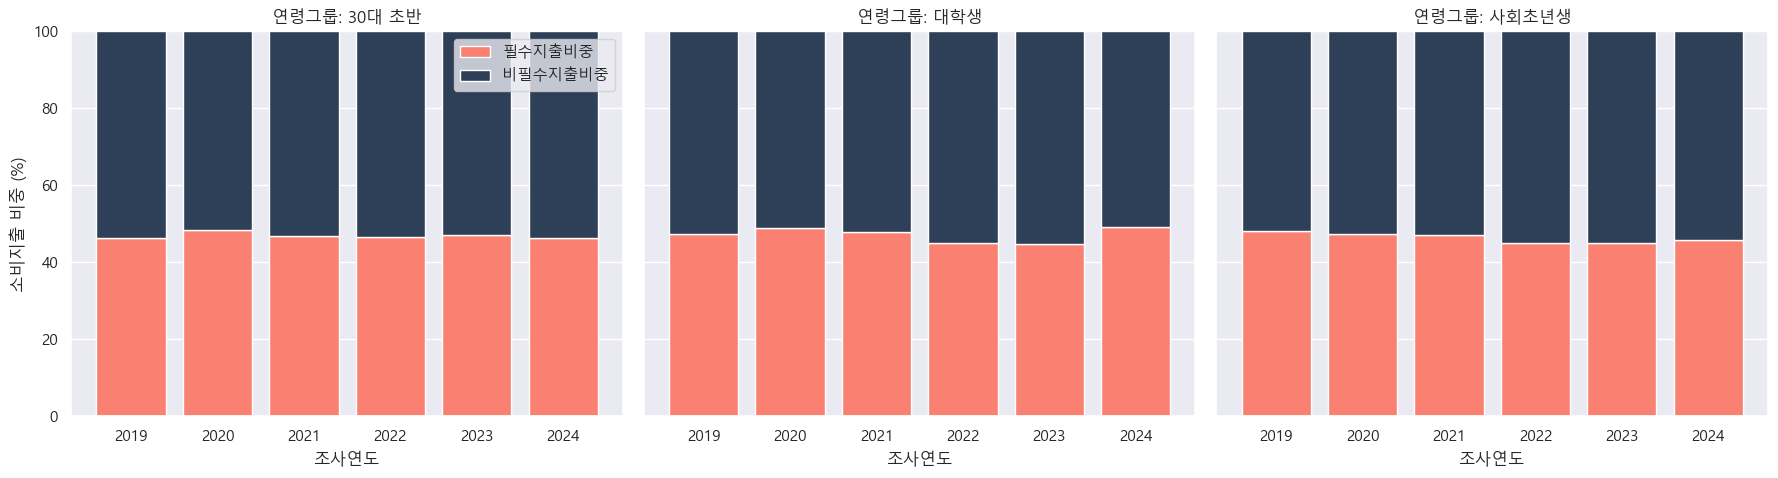

In [40]:
age_groups = sorted(young2['연령그룹'].unique())  # 3개 그룹

fig, axes = plt.subplots(1, len(age_groups), figsize=(18, 5), sharey=True)

for i, age in enumerate(age_groups):
    ax = axes[i]
    subset = young2[young2['연령그룹'] == age].groupby('조사연도')[['필수지출비중', '비필수지출비중']].mean().reset_index()
    ax.bar(subset['조사연도'], subset['필수지출비중'], label='필수지출비중', color='salmon')
    ax.bar(subset['조사연도'], subset['비필수지출비중'], bottom=subset['필수지출비중'], label='비필수지출비중', color='#2E4057')
    ax.set_title(f'연령그룹: {age}')
    ax.set_xlabel('조사연도')
    ax.set_ylim(0, 100)
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('소비지출 비중 (%)')
    ax.set_xticks(years)

axes[0].legend(loc='upper right')
plt.tight_layout()
plt.show()


In [42]:
print(sorted(young2['소득군'].unique()))


['200-300만원 미만', '200만원 미만', '300-400만원 미만', '400만원 이상']


- 여기까지의 그래프가 굉장히 의미없는 그래프라고 생각해서.. 다시 선그래프로 바꾸겠습니다!

### 선 그래프 (중앙값) 비교
- 그룹별로 그래프를 나눌 것임.

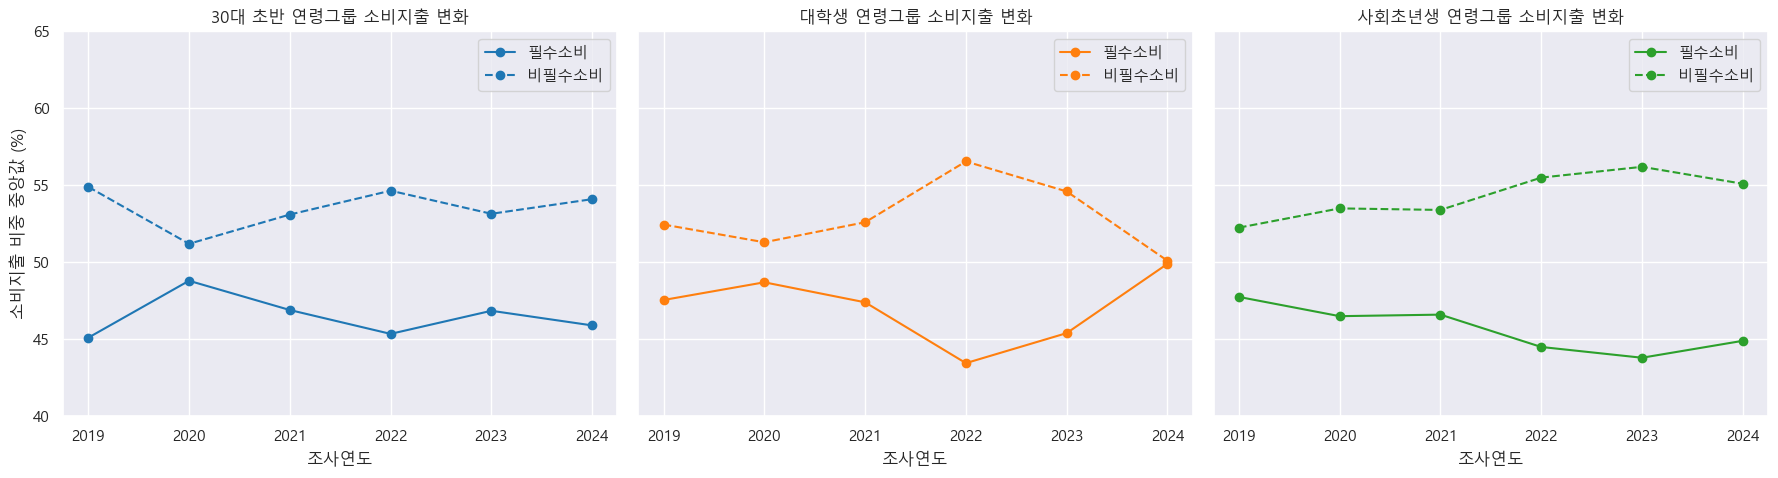

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

age_groups = sorted(young2['연령그룹'].unique())
palette = sns.color_palette("tab10", n_colors=len(age_groups))
color_dict = dict(zip(age_groups, palette))

fig, axes = plt.subplots(1, len(age_groups), figsize=(18, 5), sharey=True)

for i, age in enumerate(age_groups):
    subset = young2[young2['연령그룹'] == age].groupby('조사연도')[['필수지출비중', '비필수지출비중']].median().reset_index()
    color = color_dict[age]
    
    axes[i].plot(subset['조사연도'], subset['필수지출비중'], label='필수소비', color=color, marker='o', linestyle='-')
    axes[i].plot(subset['조사연도'], subset['비필수지출비중'], label='비필수소비', color=color, marker='o', linestyle='--')
    

plt.tight_layout()
plt.show()


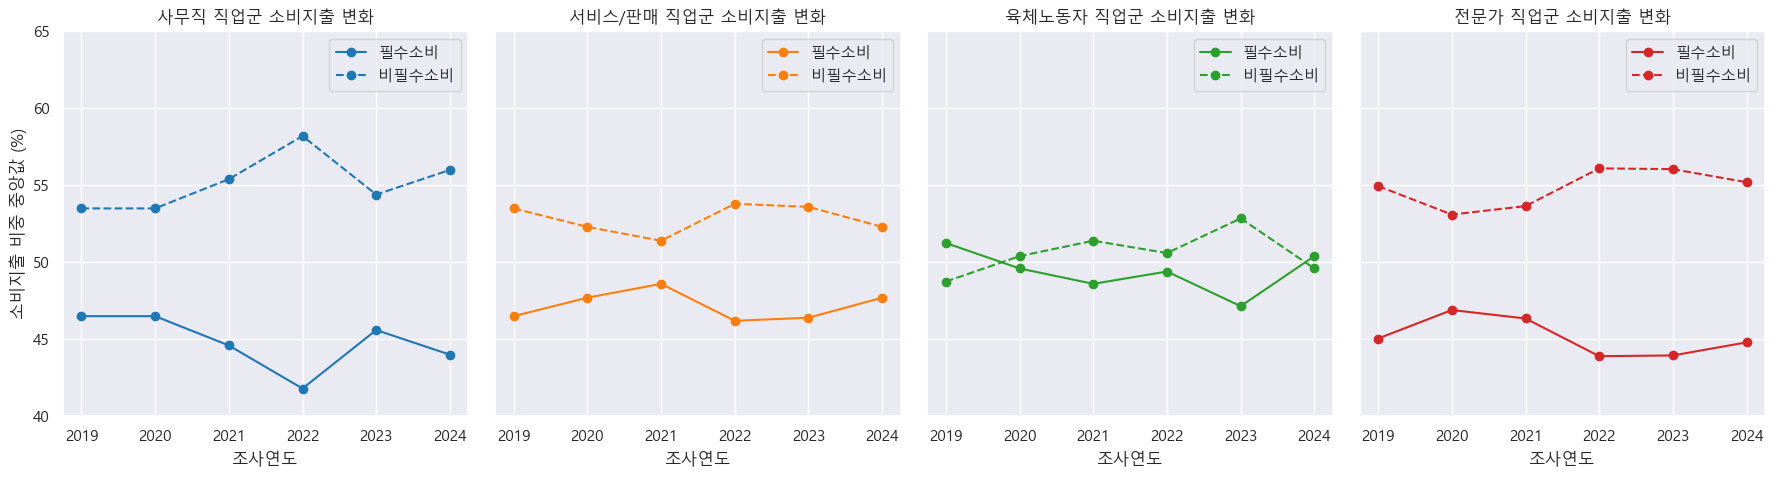

In [53]:
job_groups = sorted(young2['직업군'].unique())
palette = sns.color_palette("tab10", n_colors=len(job_groups))
color_dict = dict(zip(job_groups, palette))

fig, axes = plt.subplots(1, len(job_groups), figsize=(18, 5), sharey=True)

for i, job in enumerate(job_groups):
    subset = young2[young2['직업군'] == job].groupby('조사연도')[['필수지출비중', '비필수지출비중']].median().reset_index()
    color = color_dict[job]
    
    axes[i].plot(subset['조사연도'], subset['필수지출비중'], label='필수소비', color=color, marker='o', linestyle='-')
    axes[i].plot(subset['조사연도'], subset['비필수지출비중'], label='비필수소비', color=color, marker='o', linestyle='--')
    
    axes[i].set_title(f'{job} 직업군 소비지출 변화')
    axes[i].set_xlabel('조사연도')
    axes[i].set_ylim(40, 65)
    if i == 0:
        axes[i].set_ylabel('소비지출 비중 중앙값 (%)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


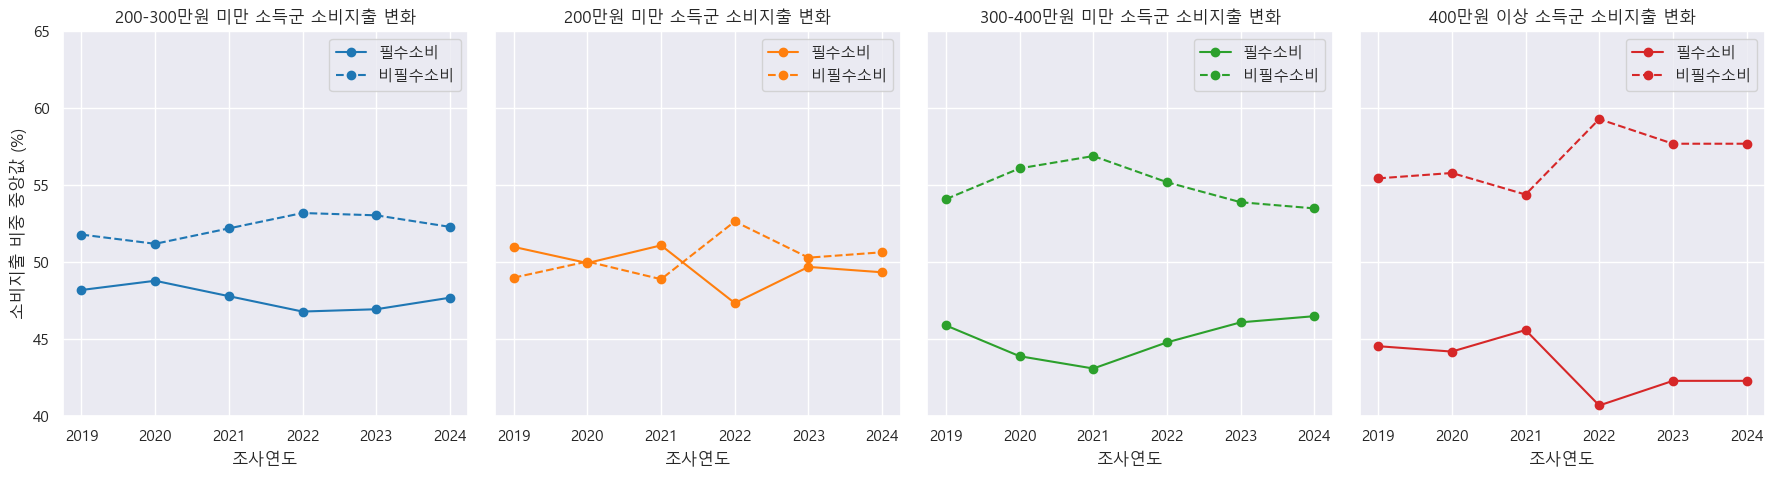

In [54]:
income_groups = sorted(young2['소득군'].unique())
palette = sns.color_palette("tab10", n_colors=len(income_groups))
color_dict = dict(zip(income_groups, palette))

fig, axes = plt.subplots(1, len(income_groups), figsize=(18, 5), sharey=True)

for i, income in enumerate(income_groups):
    subset = young2[young2['소득군'] == income].groupby('조사연도')[['필수지출비중', '비필수지출비중']].median().reset_index()
    color = color_dict[income]
    
    axes[i].plot(subset['조사연도'], subset['필수지출비중'], label='필수소비', color=color, marker='o', linestyle='-')
    axes[i].plot(subset['조사연도'], subset['비필수지출비중'], label='비필수소비', color=color, marker='o', linestyle='--')
    
    axes[i].set_title(f'{income} 소득군 소비지출 변화')
    axes[i].set_xlabel('조사연도')
    axes[i].set_ylim(40, 65)
    if i == 0:
        axes[i].set_ylabel('소비지출 비중 중앙값 (%)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


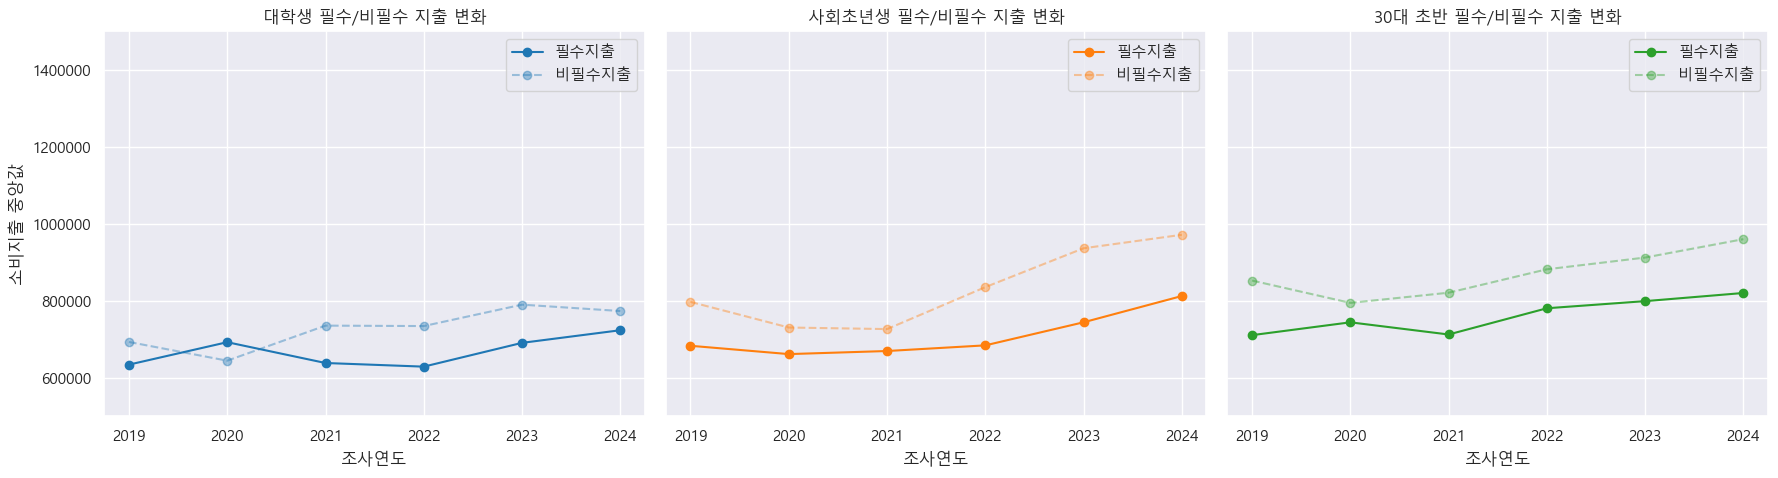

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

age_groups = ['대학생', '사회초년생', '30대 초반']
palette = sns.color_palette("tab10", n_colors=len(age_groups))
color_dict = dict(zip(age_groups, palette))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, age in enumerate(age_groups):
    subset = young2[young2['연령그룹'] == age].groupby('조사연도')[['필수지출', '비필수지출']].median().reset_index()
    color = color_dict[age]

     # 필수지출 (진한 실선)
    axes[i].plot(subset['조사연도'], subset['필수지출'], label='필수지출',
                 color=color, marker='o', linestyle='-')

    # 비필수지출 (같은 색 but 투명도 높임)
    axes[i].plot(subset['조사연도'], subset['비필수지출'], label='비필수지출',
                 color=color, alpha=0.4, marker='o', linestyle='--')

    axes[i].set_title(f'{age} 필수/비필수 지출 변화')
    axes[i].set_xlabel('조사연도')
    if i == 0:
        axes[i].set_ylabel('소비지출 중앙값')
    axes[i].legend()
    axes[i].grid(True)
    # ⛔ 지수 표기 제거
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].set_ylim(500000, 1500000)

plt.tight_layout()
plt.show()


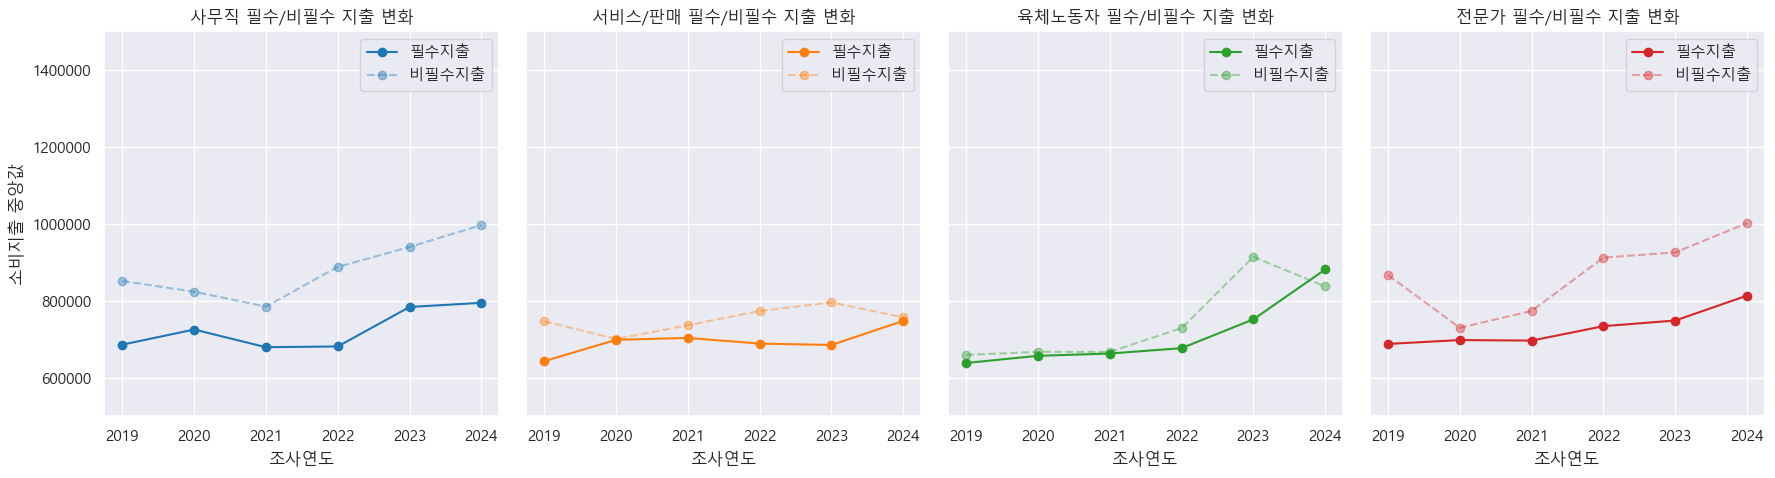

In [69]:
job_groups = sorted(young2['직업군'].unique())
palette = sns.color_palette("tab10", n_colors=len(job_groups))
color_dict = dict(zip(job_groups, palette))

fig, axes = plt.subplots(1, len(job_groups), figsize=(18, 5), sharey=True)

for i, job in enumerate(job_groups):
    subset = young2[young2['직업군'] == job].groupby('조사연도')[['필수지출', '비필수지출']].median().reset_index()
    color = color_dict[job]

 # 필수지출 (진한 실선)
    axes[i].plot(subset['조사연도'], subset['필수지출'], label='필수지출',
                 color=color, marker='o', linestyle='-')

    # 비필수지출 (같은 색 but 투명도 높임)
    axes[i].plot(subset['조사연도'], subset['비필수지출'], label='비필수지출',
                 color=color, alpha=0.4, marker='o', linestyle='--')

    axes[i].set_title(f'{job} 필수/비필수 지출 변화')
    axes[i].set_xlabel('조사연도')
    if i == 0:
        axes[i].set_ylabel('소비지출 중앙값')
    axes[i].legend()
    axes[i].grid(True)
    # ⛔ 지수 표기 제거
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].set_ylim(500000, 1500000)

plt.tight_layout()
plt.show()


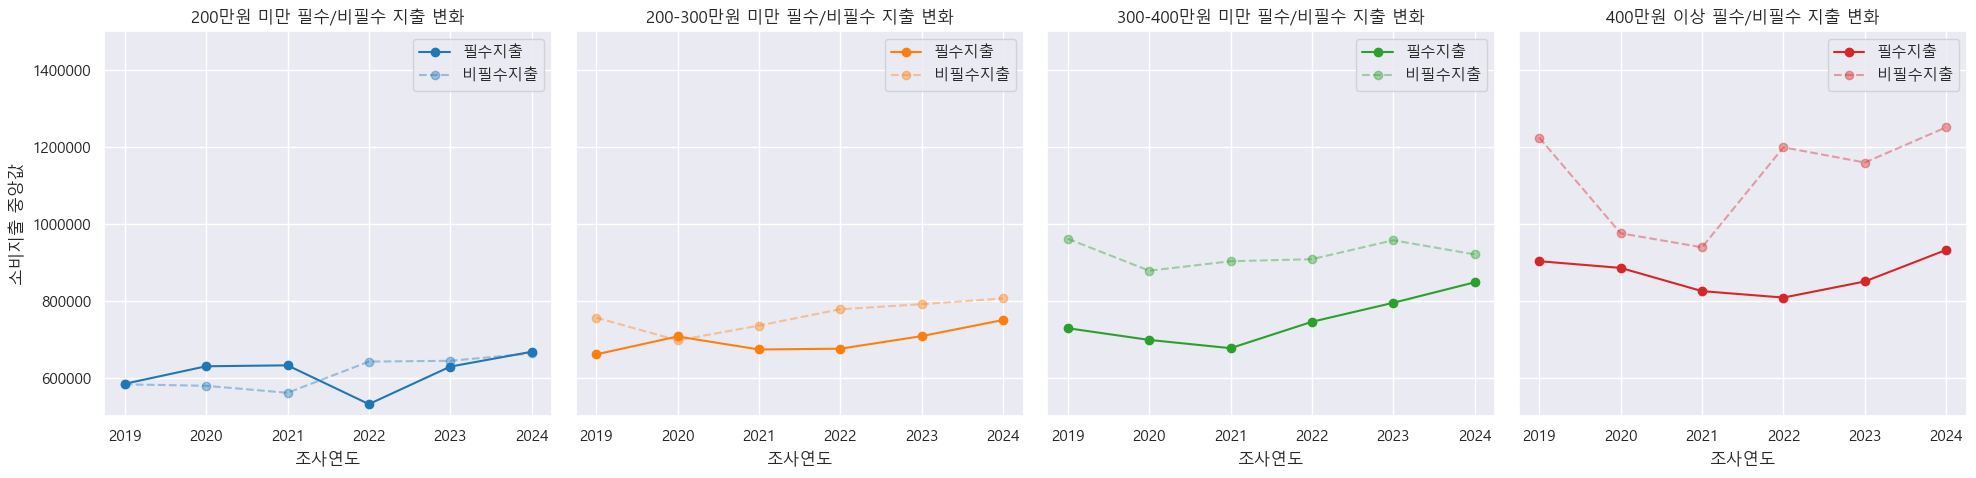

In [70]:
income_groups = ['200만원 미만', '200-300만원 미만', '300-400만원 미만', '400만원 이상']
palette = sns.color_palette("tab10", n_colors=len(income_groups))
color_dict = dict(zip(income_groups, palette))

fig, axes = plt.subplots(1, len(income_groups), figsize=(20, 5), sharey=True)

for i, income in enumerate(income_groups):
    subset = young2[young2['소득군'] == income].groupby('조사연도')[['필수지출', '비필수지출']].median().reset_index()
    color = color_dict[income]

 # 필수지출 (진한 실선)
    axes[i].plot(subset['조사연도'], subset['필수지출'], label='필수지출',
                 color=color, marker='o', linestyle='-')

    # 비필수지출 (같은 색 but 투명도 높임)
    axes[i].plot(subset['조사연도'], subset['비필수지출'], label='비필수지출',
                 color=color, alpha=0.4, marker='o', linestyle='--')

    axes[i].set_title(f'{income} 필수/비필수 지출 변화')
    axes[i].set_xlabel('조사연도')
    if i == 0:
        axes[i].set_ylabel('소비지출 중앙값')
    axes[i].legend()
    axes[i].grid(True)
    # ⛔ 지수 표기 제거
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].set_ylim(500000, 1500000)

plt.tight_layout()
plt.show()


In [59]:
young2.columns

Index(['가구원수', '성별', '나이', '학력', '직업', '종사상지위', '소득', '가계지출금액', '가계지출_소비지출금액',
       '식료품비', '주거수도광열비', '보건제품구입비', '교통비', '통신비', '주류담배구입비', '의류신발구입비',
       '가정용품가사서비스이용금액', '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용금액', '조사연도', '연령그룹',
       '직업군', '소득군', '필수지출', '비필수지출', '필수지출비중', '비필수지출비중'],
      dtype='object')

In [60]:
print(young2[['필수지출', '비필수지출']].describe())


               필수지출         비필수지출
count  4.491000e+03  4.491000e+03
mean   8.400736e+05  9.719894e+05
std    9.979747e+05  6.881003e+05
min    6.589800e+04  8.968200e+04
25%    5.390630e+05  5.866555e+05
50%    7.222140e+05  8.334760e+05
75%    9.535410e+05  1.171668e+06
max    3.884128e+07  1.700507e+07
